In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from matplotlib import style
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [3]:
'''''# Appliances Energy Prediction data
# Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional
'''''

"''# Appliances Energy Prediction data\n# Temperature in kitchen area, in Celsius\n\nRH_1, Humidity in kitchen area, in %\n\nT2, Temperature in living room area, in Celsius\n\nRH_2, Humidity in living room area, in %\n\nT3, Temperature in laundry room area\n\nRH_3, Humidity in laundry room area, in %\n\nT4, Temperature in office room, in Celsius\n\nRH_4, Humidity in office room, in %\n\nT5, Temperature in bathroom, in Celsius\n\nRH_5, Humidity in bathroom, in %\n\nT6, Temperature outside the building (north side), in Celsius\n\nRH_6, Humidity outside the building (north side), in %\n\nT7, Temperature in ironing room , in Celsius\n\nRH_7, Humidity in ironing room, in %\n\nT8, Temperature in teenager room 2, in Celsius\n\nRH_8, Humidity in teenager room 2, in %\n\nT9, Temperature in parents room, in Celsius\n\nRH_9, Humidity in parents room, in %\n\nTo, Temperature outside (from Chievres weather station), in Celsius\n\nPressure (from Chievres weather station), in mm Hg\n\nRH_out, Humidit

In [4]:
data = pd.read_csv('energydata_complete.csv')

In [5]:
data.head(n=5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [7]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [9]:
data.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [10]:
data.drop(['date','lights'],axis=1,inplace=True)

In [11]:
data.tail(10)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19725,220,25.426667,46.060000,26.000000,41.700000,28.000000,40.760000,24.7,45.400000,23.20,...,23.2,46.700000,22.900000,755.35,55.000000,2.500000,22.500000,13.300000,23.009520,23.009520
19726,180,25.500000,46.530000,26.000000,41.725714,27.856667,40.500000,24.7,45.500000,23.20,...,23.2,46.652857,22.933333,755.30,55.000000,2.666667,22.333333,13.333333,25.296732,25.296732
19727,120,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.7,45.560000,23.20,...,23.2,46.718000,22.966667,755.25,55.000000,2.833333,22.166667,13.366667,1.796395,1.796395
19728,110,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.7,45.626667,23.20,...,23.2,46.751429,23.000000,755.20,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201
19729,90,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.7,45.626667,23.20,...,23.2,46.745000,22.866667,755.20,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,...,23.2,46.790000,22.733333,755.20,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,...,23.2,46.790000,22.600000,755.20,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,...,23.2,46.790000,22.466667,755.20,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,...,23.2,46.817500,22.333333,755.20,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,430,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,...,23.2,46.845000,22.200000,755.20,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


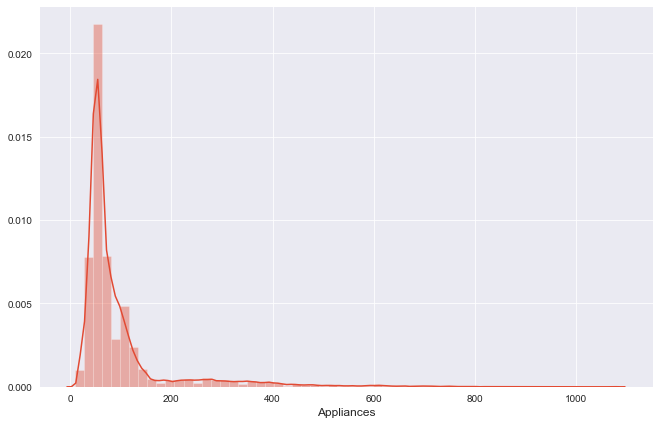

In [12]:
plt.figure(figsize=(11,7))
sns.distplot(data['Appliances'],bins=60)

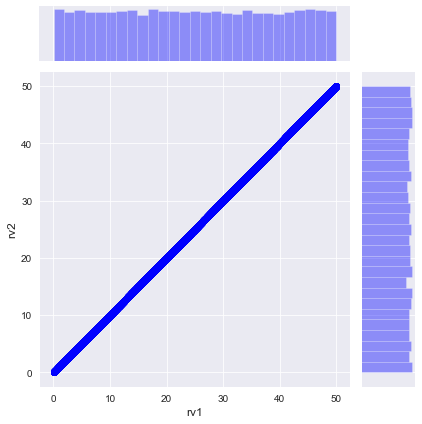

In [13]:
sns.jointplot(x='rv1',y='rv2',data=data,color='blue')

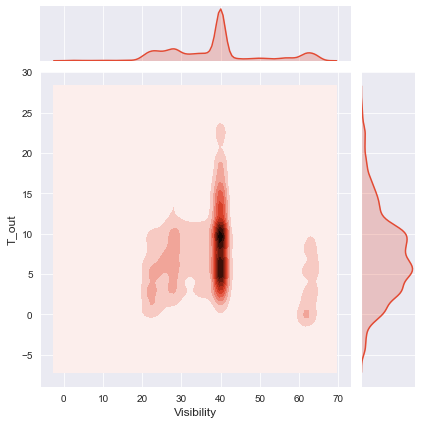

In [14]:
sns.jointplot(x='Visibility',y='T_out',data=data,kind='kde')

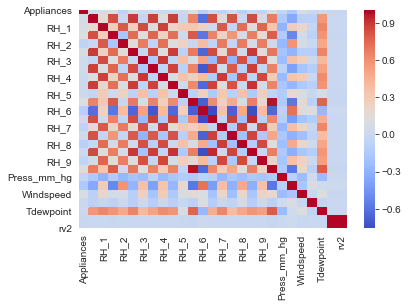

In [15]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
feat_data = scaler.fit_transform(data)

In [19]:
print(feat_data)

[[0.04672897 0.32734952 0.56618659 ... 0.53846154 0.26544891 0.26544891]
 [0.04672897 0.32734952 0.54132648 ... 0.53393665 0.37208289 0.37208289]
 [0.03738318 0.32734952 0.53050179 ... 0.52941176 0.57284766 0.57284766]
 ...
 [0.24299065 0.91974657 0.53866618 ... 0.89894419 0.58397859 0.58397859]
 [0.38317757 0.91974657 0.54949087 ... 0.8974359  0.12637146 0.12637146]
 [0.39252336 0.91974657 0.53875791 ... 0.8959276  0.68239057 0.68239057]]


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
scaled_data = pd.DataFrame(feat_data,columns=data.columns)
scaled_data.head(10)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
5,0.037383,0.32735,0.522980,0.225345,0.675883,0.215188,0.755569,0.341441,0.771233,0.172320,...,0.219563,0.667357,0.354234,0.109302,0.894737,0.380952,0.658974,0.515837,0.898441,0.898441
6,0.046729,0.32735,0.515824,0.225345,0.675883,0.215188,0.754012,0.341441,0.773794,0.169135,...,0.219563,0.667357,0.350482,0.111628,0.894737,0.357143,0.600000,0.511312,0.944735,0.944735
7,0.046729,0.32383,0.510137,0.225345,0.675883,0.210203,0.754012,0.341441,0.776924,0.169135,...,0.219563,0.667357,0.351018,0.113178,0.892544,0.369048,0.600000,0.510558,0.660808,0.660808
8,0.046729,0.31679,0.511169,0.225345,0.674009,0.210203,0.748871,0.341441,0.773794,0.175506,...,0.219563,0.667357,0.351554,0.114729,0.890351,0.380952,0.600000,0.509804,0.629118,0.629118
9,0.056075,0.32383,0.524723,0.227526,0.673072,0.215188,0.752298,0.341441,0.786883,0.169135,...,0.219563,0.667357,0.352090,0.116279,0.888158,0.392857,0.600000,0.509050,0.061691,0.061691


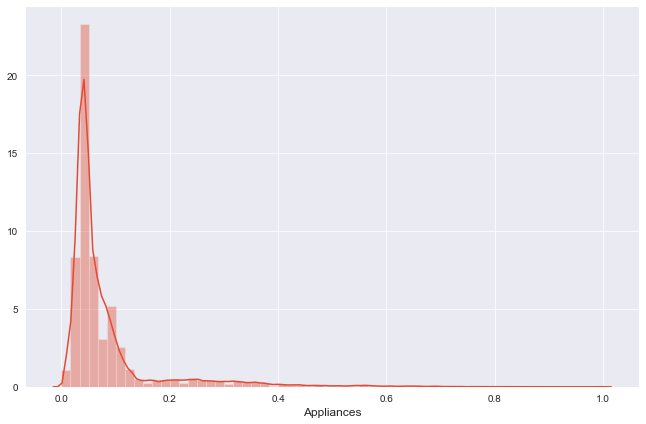

In [22]:
plt.figure(figsize=(11,7))
sns.distplot(scaled_data['Appliances'],bins=60)

In [89]:
X = scaled_data.drop('Appliances',axis=1)
y = scaled_data['Appliances']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression()

In [93]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
predict = model.predict(X_test)

In [95]:
print(model.intercept_)

0.15290295882253008


In [96]:
model.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

In [97]:
X_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [98]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

In [99]:
cdf

,Coeff
T1,-0.003281
RH_1,0.553547
T2,-0.236178
RH_2,-0.456698
T3,0.290627
RH_3,0.096048
T4,0.028981
RH_4,0.026386
T5,-0.015657
RH_5,0.016006


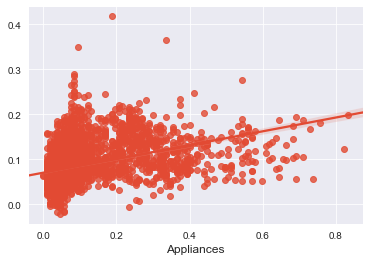

In [100]:
sns.regplot(y_test,predict)

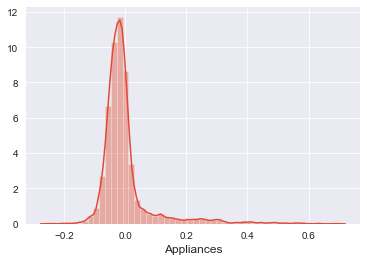

In [101]:
sns.distplot(y_test-predict)

In [102]:
from sklearn import metrics

In [103]:
MAE = metrics.mean_absolute_error(y_test,predict)
print(MAE)

0.05013362397742957


In [104]:
MSE = metrics.mean_squared_error(y_test,predict)
print(MSE)

0.00765877886719537


In [105]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predict))
print(RMSE)

0.08751444947661711


In [106]:
r_squared = metrics.r2_score(y_test,predict)
print(r_squared)

0.14890246319303513


In [107]:
rss = np.sum(np.square(y_test - predict))
print(rss)

45.347629672663786


In [108]:
def get_weights_df(model,feat,col_name):
    weights = pd.Series(model.coef_,feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df
    
    

In [109]:
from sklearn.linear_model import Lasso,Ridge

In [110]:
lasso_reg = Lasso(alpha=0.001)

In [111]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
ridge_reg = Ridge(alpha=0.4)

In [114]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
po = ridge_reg.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,po))
print(RMSE)

0.08753385704628003


In [48]:
linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [49]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


In [65]:
X=scaled_data.drop(['T2','T6'],1)
y=scaled_data[['T2','T6']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model = LinearRegression()

In [66]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
pred = model.predict(X_test)

In [69]:
r_squared = metrics.r2_score(y_test,pred)
print(r_squared)

0.9630086620834901


In [70]:
MAE = metrics.mean_absolute_error(y_test,pred)
print(MAE)

0.023846038430632283


In [71]:
rss = np.sum(np.square(y_test - pred))
print(rss)

T2    5.949375
T6    6.349911
dtype: float64
